## project boolean

# Abstract

Percolation theory describes how the size of clusters of connected set of edges of large random networks
varies as the connectivity - i.e. (for example) the probability that two vertices are connected by an edge - changes. As the
connectivity increases the system undergoes a transition from a situation where the clusters are small in size to
a picture with significantly larger clusters. This transition is not smooth, but rather it happens sharply as the
connectivity crosses a critical value, called percolation threshold∗. The scope of the present project is to study
numerically this phenomenon in Boolean networks

check:
-   perculation thery: wiki -> In statistical physics and mathematics, percolation theory describes the behavior of a network when nodes or links are added. This is a geometric type of phase transition, since at a critical fraction of addition the network of small, disconnected clusters merge into significantly larger connected, so-called spanning clusters.

-   perculation threshold
-   Boolean model network on R^2

# Boolean model network on R^2

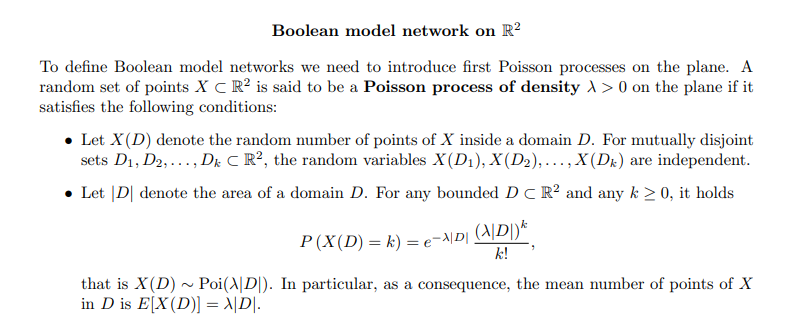

POISSON PROCESSES OF DENSITY

input: 

-   random set of X (sotto insieme di una parabola?? -> X C R^2??)

-   Dk -> k number of domain??, each D is a C of R^2

we want:

X -> Ppd if λ > 0

condition:

-   X(D): denote the number of X inside a domain D, the random variables X(D1), X(D2), ... , X(Dk) are independent; 

-   |D| denote the area of a domain D; k>=0 (how calculate the area of D?? is T*T??)

    P(X(D) = k) = e^(-λ|D|)((λ|D|)^k/k!);

    X(D) -> Poi(λ|D|);

    E[X(D)] = λ|D|



quindi come si legge?? 

-   X(D) è il numero di X dentro un dominio D
    quindi mi sembra di capire che dato un dominio D noi prendiamo X valori dal dominio e X è una poisson (CAPIRE)
-   so che X(D) è una poasson con valori densità (λ) * area di D
-   so che la densità (λ) * area di D è uguale alla media dei punti di X dentro D


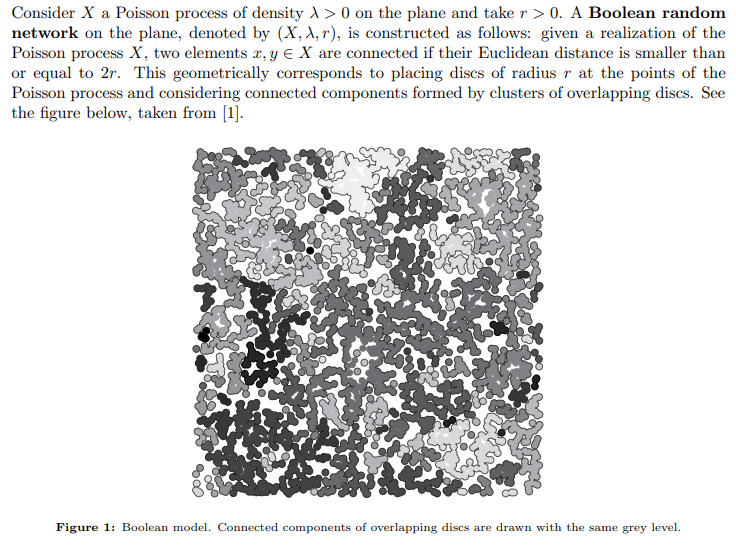

Boolean random network:

-   denote by : X, density > 0, r = raggio > 0

-   due elementi x,y che appartengono a X sono connessi se la loro distanza (Euclidian distance) è più piccola o uguale a 2 volte r 

-   geometricamente corrisponde a mettere dei dischi di raggio r sui punti della poisson process e consideriamo i componenti connessi quelli formati da dischi sovrapposti

praticamente per ogni punto della poisson gli applichiamo un cerchio attorno di raggio r, se due punti con i raggio si sovrappongono allora li raggruppiamo in un unico cluster!!!! (credo)

# Algorithm to simulate a Poisson process on a square

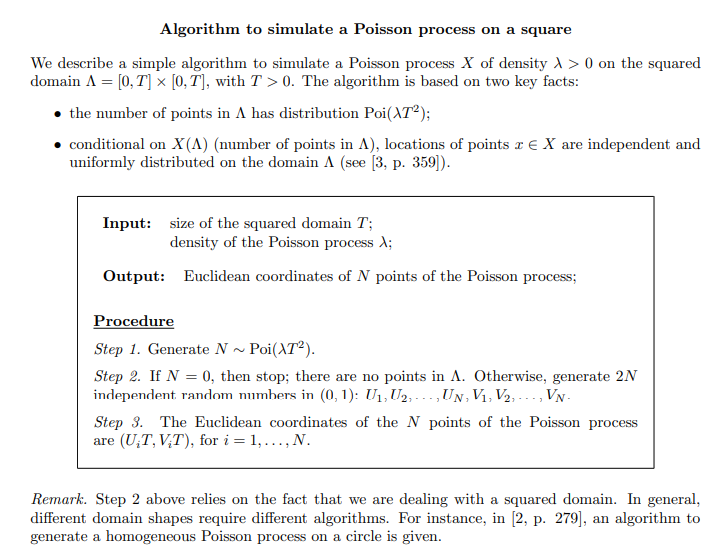

-   Λ = a D?; si perchè Λ è un dominio come D

due punti chaive:

-   adesso sappiamo che Λ o D è una distribuzione di poison(λ*T^2)
-   conditional on X(Λ) (number of points in Λ), locations of points x ∈ X are independent and
uniformly distributed on the domain Λ

input:

-   T -> grandezza del dominio
-   densiti (λ)

output:

-   coordinate euclidee di N points della poisson

Passaggi:

-   step1: generare gli N points come poisson (λT^2) quindi generare il dominio?? penso di si (creare il dominio) (N è X?? credo di si)
-   step2: generare 2N independent random numbers in (0,1) (genrare due volte N?? oppure prendere N e moltiplicarlo per 2?? NON HO CAPITO) (U1,U2,...,UN V1,V2,...,VN)
-   step3: calcolare le coordinate euclidee di N point -> (UiT, ViT) for i = 1,...,N (calcolare le coordinate)   

# Project

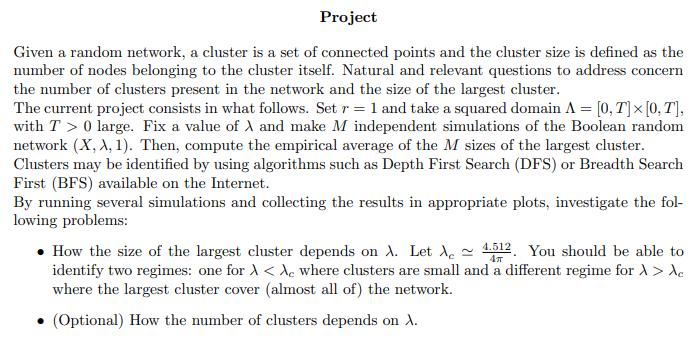

-   random network
-   we have to cluster points
-   number of clusters and size of clusters (question) (will return)

current project:
-   set r = 1
-   set T > 0
-   square domain D o Λ = [0,T] * [0,T]
-   set λ
-   we have to make M independent simulation of the Boolean random network:
    -   so first set M
    -   loop of M
        -   create X -> vedere poisson process on square
        -   create M Boolean network of (X, λ, r)
        -   cluster algorithm Depth First Search(DFS) or Breadth Search
First(BFS)
-   compute the empirical average of the M sizes of the largest cluster
-   collect the results in plots

question:

-   How the size of the largest cluster depends on λ. Let λc '
4.512
4π
. You should be able to
identify two regimes: one for λ < λc where clusters are small and a different regime for λ > λc
where the largest cluster cover (almost all of) the network.

-   How the number of clusters depends on λ

perculation theorem and perculation treshold?????? dove e come si usano???

# TEST 1

In [1]:
# try something for the project
#import numpy as np
#import matplotlib.pyplot as plt
#import math
#ok per la parte dei boolean network mi consigliano networkx
#oppure provare usare pyboolnet
#import networkx as nx

#my_generator = np.random.default_rng()

In [ ]:
#euclidian distance #TESTARE
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point2[i] - point1[i]) ** 2
    return math.sqrt(distance)

# OR use numpy
#dist = np.linalg.norm(point1 - point2)

In [ ]:
#function for the creation of the boolean network
def creation_boolena_network(N, points,r):
    #empty graph
    #nx.Graph? A Graph stores nodes and edges with optional data, or attributes
    #Edges are represented as links between nodes with optional key/value attributes
    graph = nx.Graph()
    #add the points in the graph
    #graph.add_nodes_from? nodes_for_adding : iterable container, attr: attributes
    graph.add_nodes_from(range(N))

    #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
    #check if two points have distance(euclidea) < 2*r
    for i in range(N):
        for j in range(i+1,N):
            #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
            #    graph.add_edge(i,j)
            if np.linalg.norm(points[i] - points[j]) <= 2*r:
                graph.add_edge(i,j) #add edge #CAPIRE MEGLIO; add an edge between the nodes
    
    return graph

In [ ]:
#Algorithm to simulate a Poisson process on a square
#function to create X

def generate_points(density, T):
    #Step 1. Generate N ∼ Poi(λT2).
    # define X -> random number of points inside a domain D (square domain)
    # X(D) -> poi(density|D|)
    # N -> poi(density*T^2)
    #np.random.poisson?
    #N = np.random.poisson(density*T*T)
    N = my_generator.poisson(lam=density*T*T)
    print(N)

    #Step 2. If N = 0, then stop; there are no points in Λ. Otherwise, generate 2N
    #independent random numbers in (0, 1): U1, U2, . . . , UN , V1, V2, . . . , VN .
    #controll that number_of_points is more than 0
    if N == 0: # how it can be 0????
        #stop
        return 0
    else:
        # generate 2N independent random numbers in (0, 1): U1, U2, . . . , UN , V1, V2, . . . , VN
        #points = np.random.uniform(0, T, (N, 2)) #
        #np.random.uniform? Samples are uniformly distributed over the half-open interval
        #parameters 
            # low = lower boundary -> 0
            # high = upper boudary -> 1
            # size = output shape (N,2) -> N*2
            # output format Ui,Vi
        #points = np.random.uniform(low = 0, high = 1, size = (N, 2)) #
        #points = my_generator.uniform(low = 0, high = 1, size = (N, 2)) #
        points = my_generator.uniform(low = 0, high = T, size = (N, 2)) #PROVARE COSIIIII OK
        return N, points
        #return points #for TEST2

In [ ]:
#FIRST TEST
#input
r = 1 #radius of discs
#T = np.random.randint(100,200) #set size of the squared domain as a rnadom value between 10 e 20  
#T = 200 #set size of the domain #200 -> too much time , test with 10
T = 10
#density lambda
density = 0.1 #i dont know the best number!! (PER OGNI LOOP DEVO AUMENTARE LA DENSITA DI UN TOT)
#i have to also set the number of simulation 
M = 10

# now i try to generate the points
#for the pois i can use the formulation or i can search a library (numpy)
#pois is lambda * T^2
N, points = generate_points(density, T)
if (len(points) == 0): #we dont have points
    print("error N = 0")
else: 
    #print(points)
    #print("size points: ",points.shape)

    #now i create the boolean network model
    #ATTENZIONE dall esempio/projetto mi sembra che al creation_bool devo passare il numero di
    #punti nel dominio e non i punti; forse i punti li devo creare nel creation_bool
    #pero guardando l'esempio del algorithmo di poisson mi verebbe da fare tutto 
    #in un colpo; in caso creare due versioni!!!
    #OPPURE nel loop per creare i graph metto anche quello er la creazione
    #dei punti pero dovrei tenere fuori N (X) perchè è sempre lo stesso nella 
    #creazione del boolean network (quindi creazione N; loop -> creazione loop, creazione bool)
    graph_bool = creation_boolena_network(N, points,r)
    print(graph_bool)



# TEST 2

In [18]:
# try something for the project
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

my_generator = np.random.default_rng()

In [19]:
def number_points(density, T):
    N = my_generator.poisson(lam=density*T*T)
    return N

In [20]:
# A Boolean random network on the plane, denoted by (X, λ, r)

def creation_boolean_network_test2(N_points, T, r):

    #given a realization of the Poisson process X
    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N_points, 2))

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 
        #creation graph
        #empty graph
        #nx.Graph? A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        #graph.add_nodes_from? nodes_for_adding : iterable container, attr: attributes
        graph.add_nodes_from(range(N_points))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N_points):
            for j in range(i+1, N_points):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node
        
        plot_boolean_network(graph, points, T)

        return graph

In [21]:
# Function to plot the Boolean network
def plot_boolean_network(graph, points, T):

    clusters = list(nx.connected_components(graph))
    largest_cluster = max(clusters, key=len)

    pos = {}
    for i in range(len(points)):
        pos[i] = points[i]
    
    plt.figure(figsize=(15, 15))
    #nx.draw(graph, pos, node_size=30, node_color='blue', with_labels=True, font_size = 8)
    nx.draw_networkx(graph, pos, node_size=30, node_color='yellow', with_labels=True, font_size = 8, font_color = 'black')
    #try to change the color for the largest cluster
    nx.draw_networkx(graph, pos, nodelist = largest_cluster, node_color = 'red', with_labels=False)
    
    plt.xlim(0, T)
    plt.ylim(0, T)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Boolean Network')
    plt.show()

In [22]:
def find_largest_cluster(graph):
    
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    clusters = list(nx.connected_components(graph)) 
    print("clusters: ", clusters)

    #print("test dfs:")
    #for i in nx.edge_dfs(graph):
    #    print(i)
    #ok parto da un nodo, lo salvo nei visitati, guardo quali sono gli altri nodi collegati
    #con edge e li inserisco in visitari, alla fine li salvo in un claster, passo al nodo succesivo 
    # cioè a quello che non ha visitato??
    #The depth-first search (DFS) algorithm starts from a given vertex and explores as far as possible along each branch before backtracking. It uses a stack data structure to keep track of vertices to visit. The algorithm begins by pushing the starting vertex onto the stack and continues until all vertices have been visited.
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)
    print("largest_cluster: ", largest_cluster)

    #return the size of the largest cluster
    return len(largest_cluster)

In [23]:
#find the empirical average and plot
def empirical_average(largest_cluster):

    #mean size of the largest clusters 
    mean = np.mean(largest_cluster)
    print("Empirical average of the M sizes of the largest cluster: ",mean)

    #plot
    plt.hist(largest_cluster, bins=30, edgecolor = 'black')
    plt.title('Distribution of Largest Cluster Sizes')
    plt.xlabel('Size of Largest Cluster')
    plt.ylabel('Frequency')
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label=f'Average = {mean:.2f}')
    plt.legend()
    plt.show()

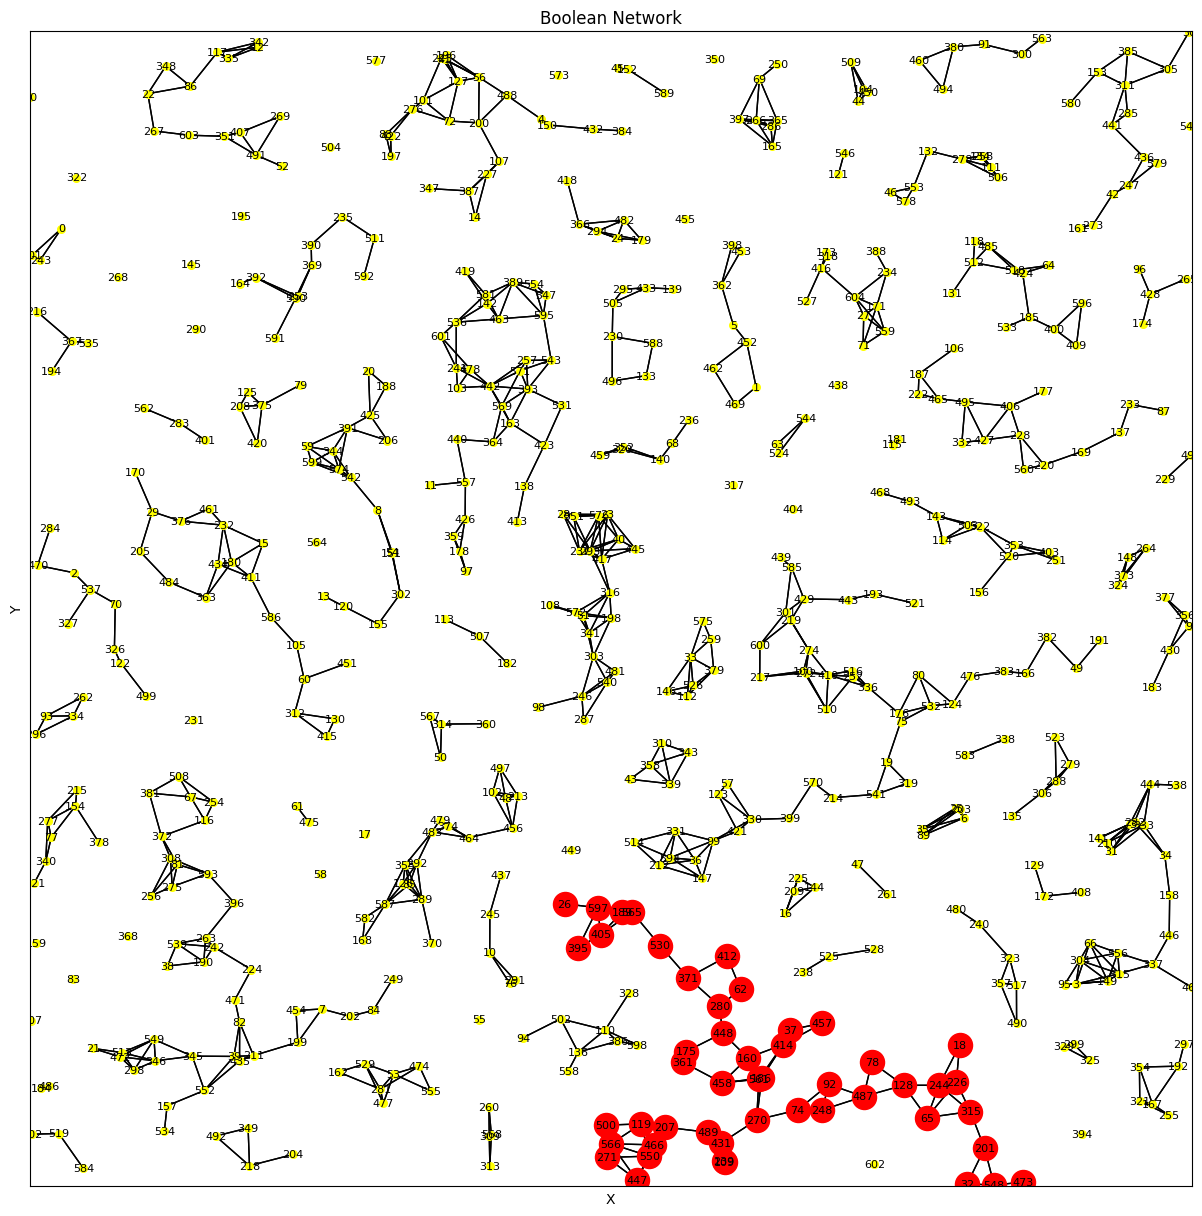

Graph with 605 nodes and 873 edges
clusters:  [{0, 243, 501}, {1, 452, 5, 453, 362, 462, 398, 469}, {2, 70, 327, 326, 499, 470, 537, 122, 284}, {515, 3, 141, 149, 282, 538, 158, 31, 34, 556, 304, 444, 446, 66, 73, 333, 337, 210, 467, 95}, {384, 387, 4, 14, 276, 150, 422, 41, 432, 56, 196, 197, 200, 72, 88, 347, 223, 227, 101, 488, 107, 127}, {35, 6, 203, 89, 25}, {256, 513, 7, 263, 396, 275, 21, 534, 539, 157, 549, 38, 39, 552, 298, 435, 308, 190, 67, 454, 199, 202, 593, 82, 211, 84, 81, 471, 472, 345, 346, 224, 242, 372, 116, 249, 508, 381, 254}, {344, 391, 8, 574, 59, 425, 13, 302, 206, 188, 20, 54, 599, 151, 155, 120, 542}, {356, 9, 430, 183, 377}, {291, 10, 76, 245, 437}, {257, 389, 393, 138, 11, 142, 531, 536, 413, 543, 163, 547, 419, 423, 426, 554, 557, 178, 440, 569, 442, 571, 581, 463, 595, 601, 478, 97, 359, 103, 364, 241}, {407, 267, 12, 491, 269, 335, 52, 117, 86, 342, 22, 603, 348, 351}, {130, 15, 411, 29, 415, 170, 434, 180, 312, 60, 451, 586, 461, 205, 484, 232, 105, 363,

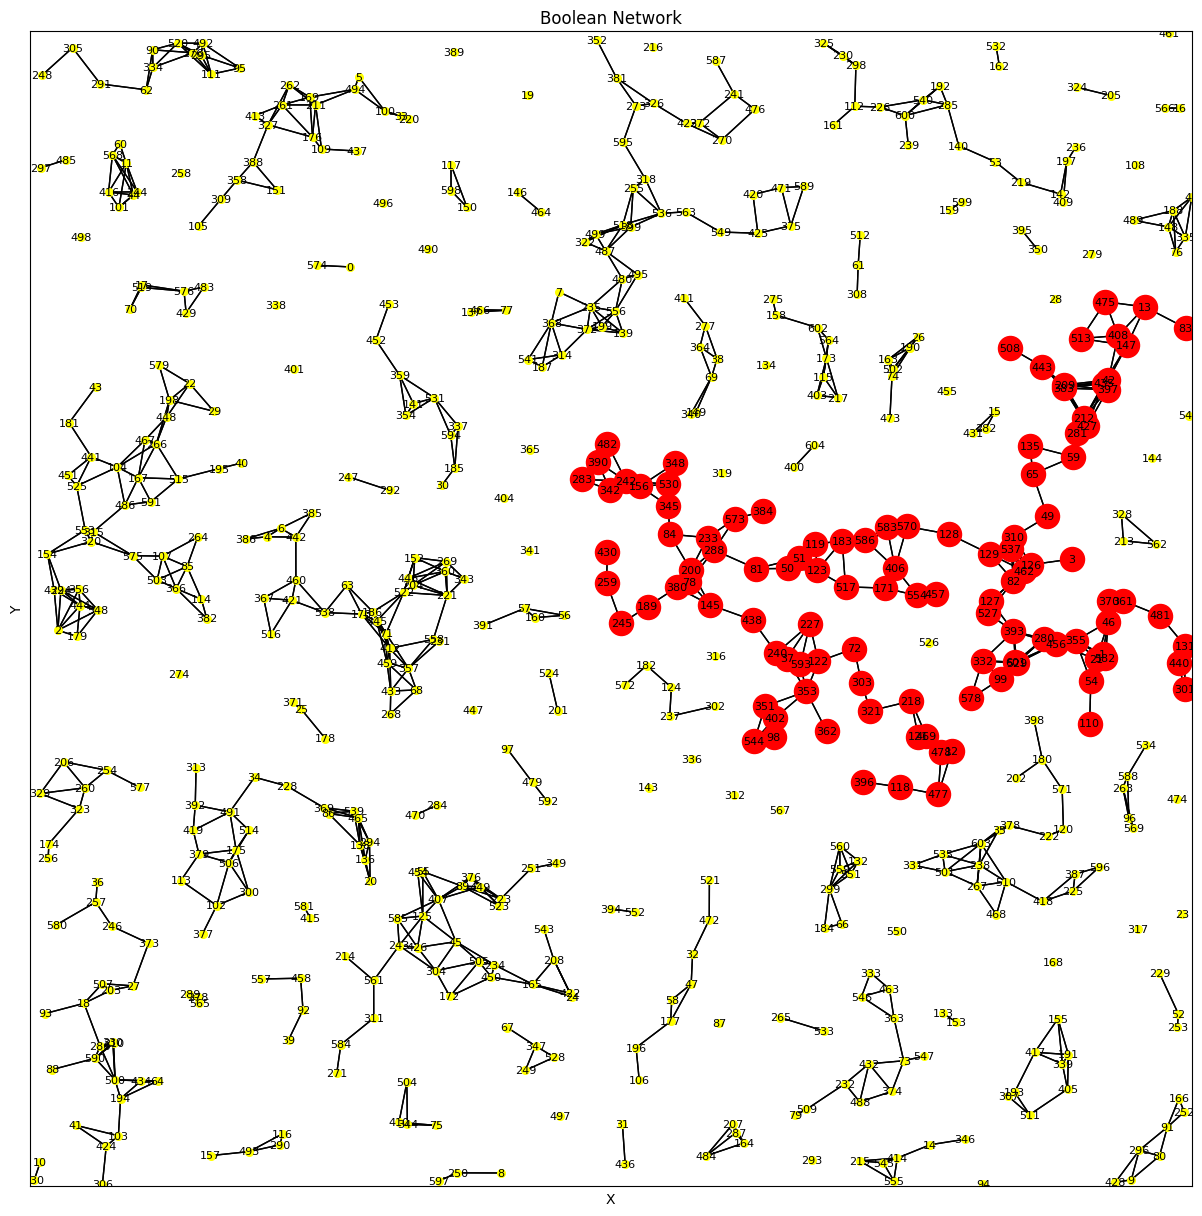

Graph with 605 nodes and 905 edges
clusters:  [{0, 574}, {1, 513, 3, 517, 12, 13, 527, 529, 530, 21, 537, 544, 37, 554, 42, 46, 49, 50, 51, 54, 570, 59, 573, 65, 578, 582, 583, 72, 586, 78, 81, 82, 83, 84, 593, 601, 98, 99, 110, 118, 119, 121, 122, 123, 126, 127, 128, 129, 131, 135, 145, 147, 156, 171, 183, 189, 200, 209, 212, 218, 227, 233, 240, 242, 245, 259, 280, 281, 283, 288, 301, 303, 310, 321, 332, 342, 345, 348, 351, 353, 355, 361, 362, 370, 380, 383, 384, 390, 393, 396, 397, 402, 406, 408, 427, 430, 435, 438, 440, 443, 456, 457, 462, 469, 475, 477, 478, 481, 482, 508}, {2, 515, 264, 266, 525, 22, 154, 29, 548, 167, 40, 553, 43, 179, 181, 439, 441, 315, 444, 575, 320, 448, 451, 195, 579, 198, 591, 467, 85, 224, 356, 486, 104, 107, 366, 114, 503, 382}, {385, 386, 4, 516, 6, 522, 268, 269, 152, 538, 412, 421, 170, 558, 433, 186, 442, 445, 446, 63, 68, 71, 459, 460, 204, 343, 221, 357, 231, 360, 367}, {388, 5, 261, 262, 151, 413, 33, 169, 176, 437, 309, 327, 211, 220, 100, 358, 10

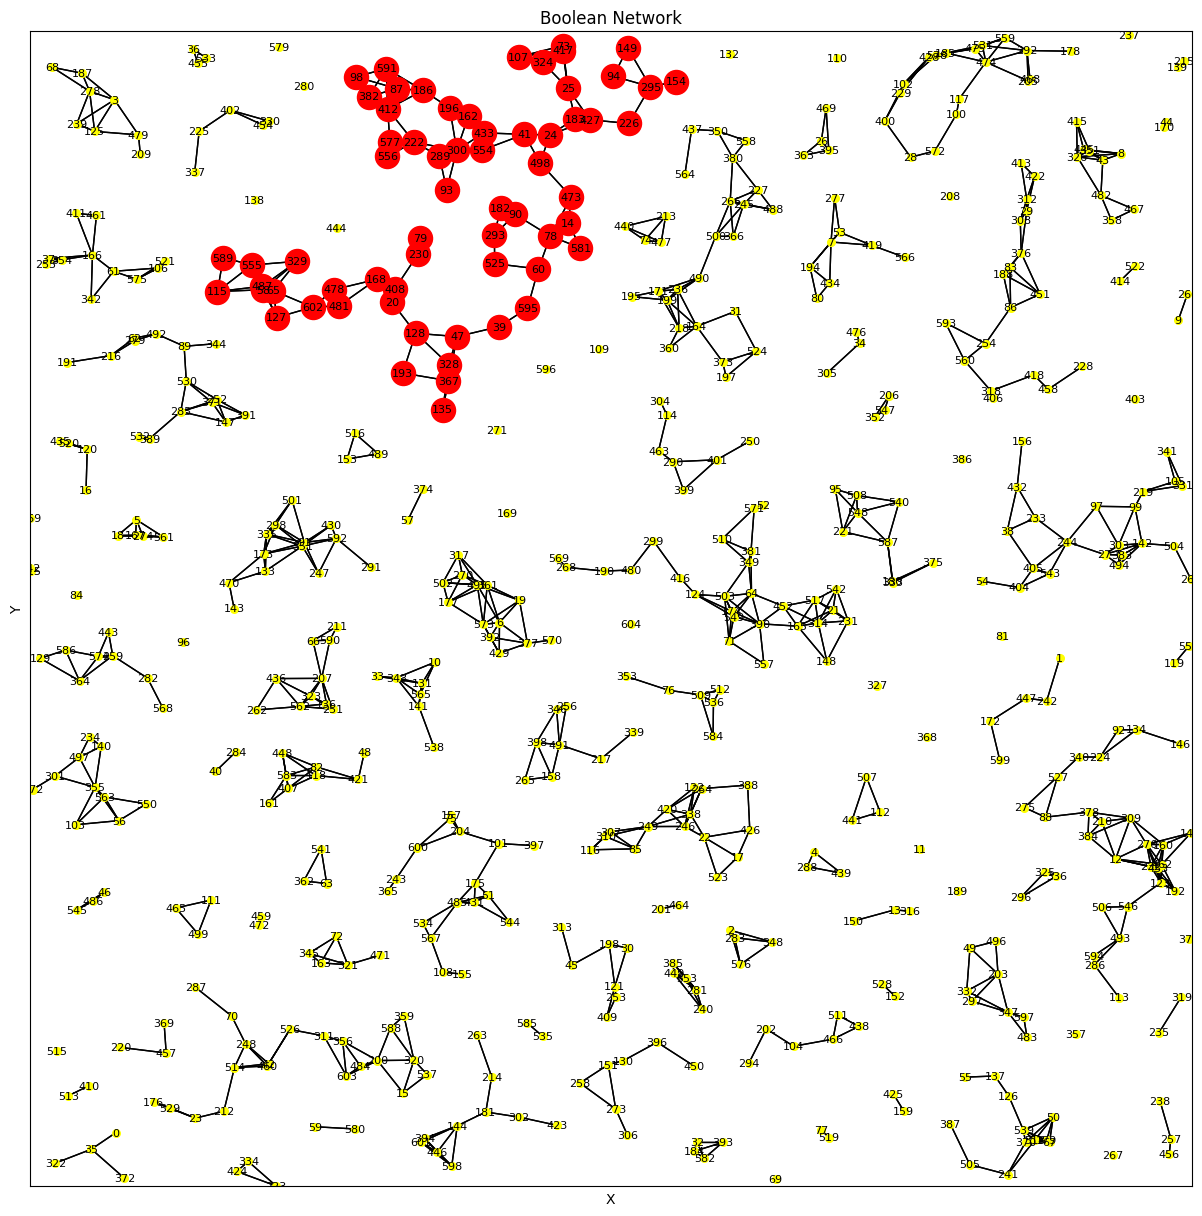

Graph with 605 nodes and 899 edges
clusters:  [{0, 322, 35, 372}, {1, 172, 242, 599, 447}, {576, 2, 283, 348}, {3, 68, 239, 209, 278, 187, 125, 479}, {288, 4, 439}, {5, 167, 561, 18, 274}, {6, 392, 361, 429, 270, 495, 177, 19, 502, 377, 570, 317, 573}, {194, 419, 7, 80, 434, 277, 53, 566}, {482, 326, 358, 8, 415, 43, 467, 445, 351}, {9, 260}, {33, 131, 10, 141, 565, 343, 538}, {11}, {384, 134, 12, 527, 145, 146, 275, 276, 286, 160, 546, 309, 192, 453, 462, 210, 594, 340, 88, 92, 224, 232, 493, 378, 113, 506, 123}, {316, 13, 150}, {128, 135, 525, 14, 20, 149, 24, 25, 154, 408, 412, 289, 162, 417, 293, 39, 295, 41, 554, 427, 300, 556, 168, 47, 555, 433, 182, 183, 186, 58, 60, 193, 577, 65, 196, 581, 324, 328, 73, 329, 589, 78, 591, 79, 595, 87, 473, 90, 602, 93, 222, 94, 478, 481, 226, 98, 230, 487, 107, 367, 498, 115, 382, 127}, {514, 526, 15, 529, 23, 537, 287, 42, 176, 311, 320, 70, 200, 588, 460, 212, 603, 356, 484, 359, 248}, {16, 520, 435, 120}, {388, 420, 264, 426, 523, 17, 338, 3

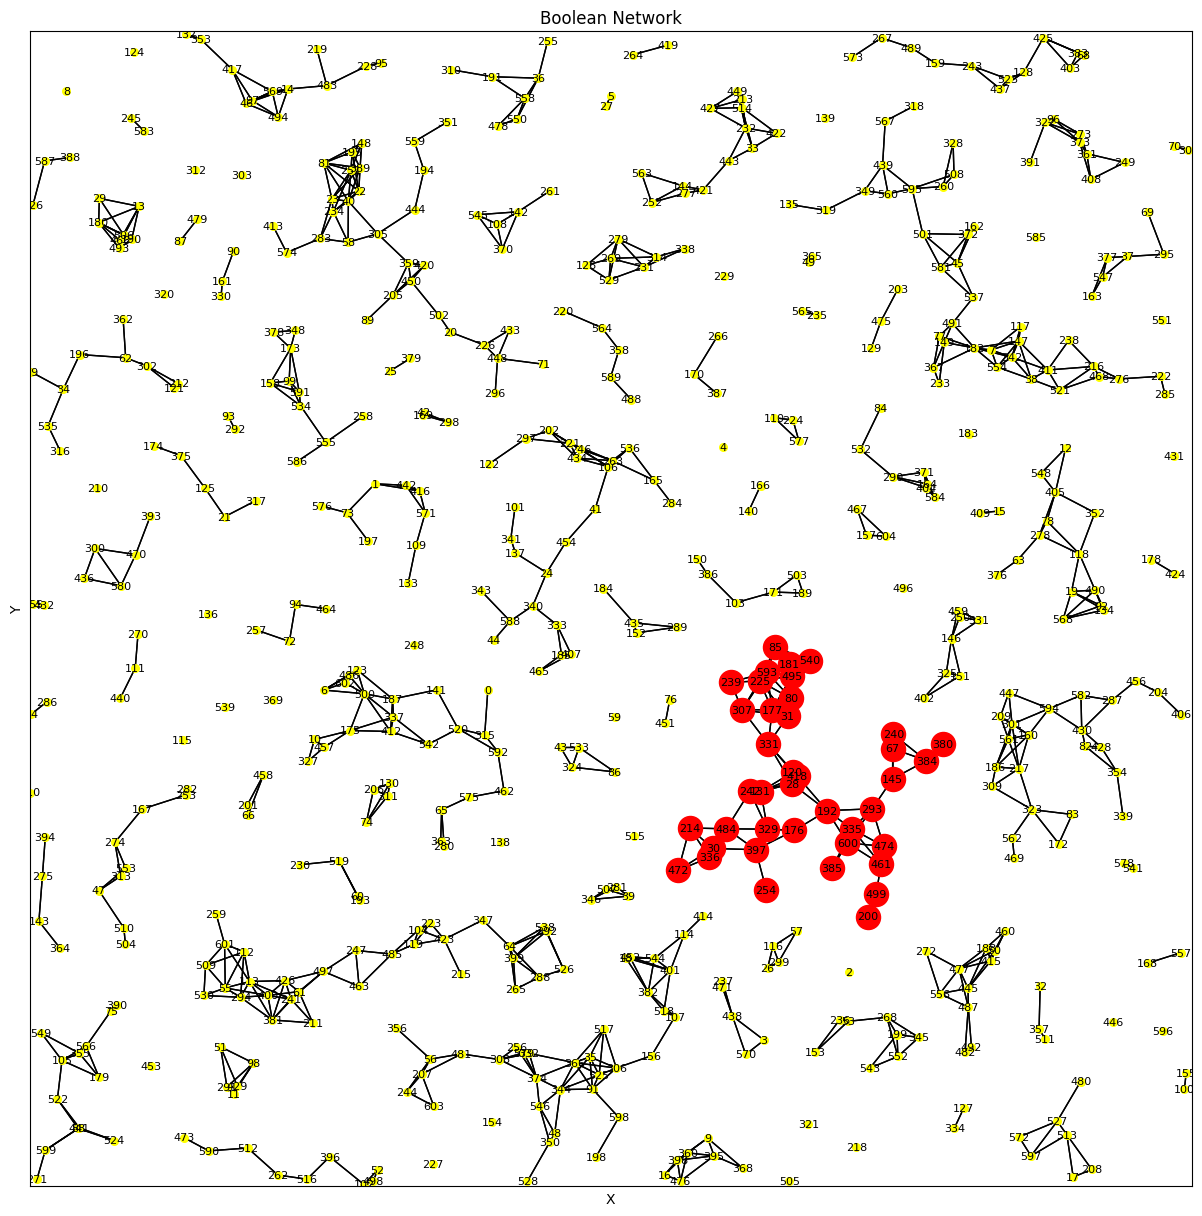

Graph with 605 nodes and 891 edges
clusters:  [{0, 6, 520, 10, 141, 280, 412, 542, 175, 187, 315, 575, 65, 327, 457, 462, 592, 337, 602, 486, 363, 500, 123}, {416, 1, 576, 197, 133, 73, 109, 442, 571}, {2}, {3, 237, 438, 471, 570}, {4}, {27, 5}, {260, 7, 135, 521, 147, 276, 149, 537, 411, 285, 162, 38, 554, 45, 560, 182, 439, 567, 318, 319, 581, 328, 77, 595, 468, 342, 216, 349, 222, 233, 491, 238, 367, 372, 117, 501, 508}, {8}, {360, 9, 395, 398, 368, 16, 476}, {98, 291, 11, 429, 51}, {352, 548, 134, 490, 568, 12, 78, 19, 405, 278, 118, 376, 92, 63}, {13, 493, 466, 180, 506, 29, 190}, {97, 417, 483, 228, 353, 132, 46, 14, 494, 569, 219, 95}, {409, 15}, {480, 513, 527, 208, 17, 597, 572}, {256, 517, 518, 525, 528, 401, 18, 156, 414, 544, 546, 35, 48, 306, 308, 56, 579, 452, 198, 332, 207, 598, 344, 91, 603, 350, 481, 356, 107, 366, 114, 244, 374, 382}, {389, 20, 148, 22, 23, 283, 413, 420, 296, 40, 559, 433, 305, 58, 444, 574, 448, 450, 194, 195, 71, 205, 81, 89, 351, 226, 359, 234, 50

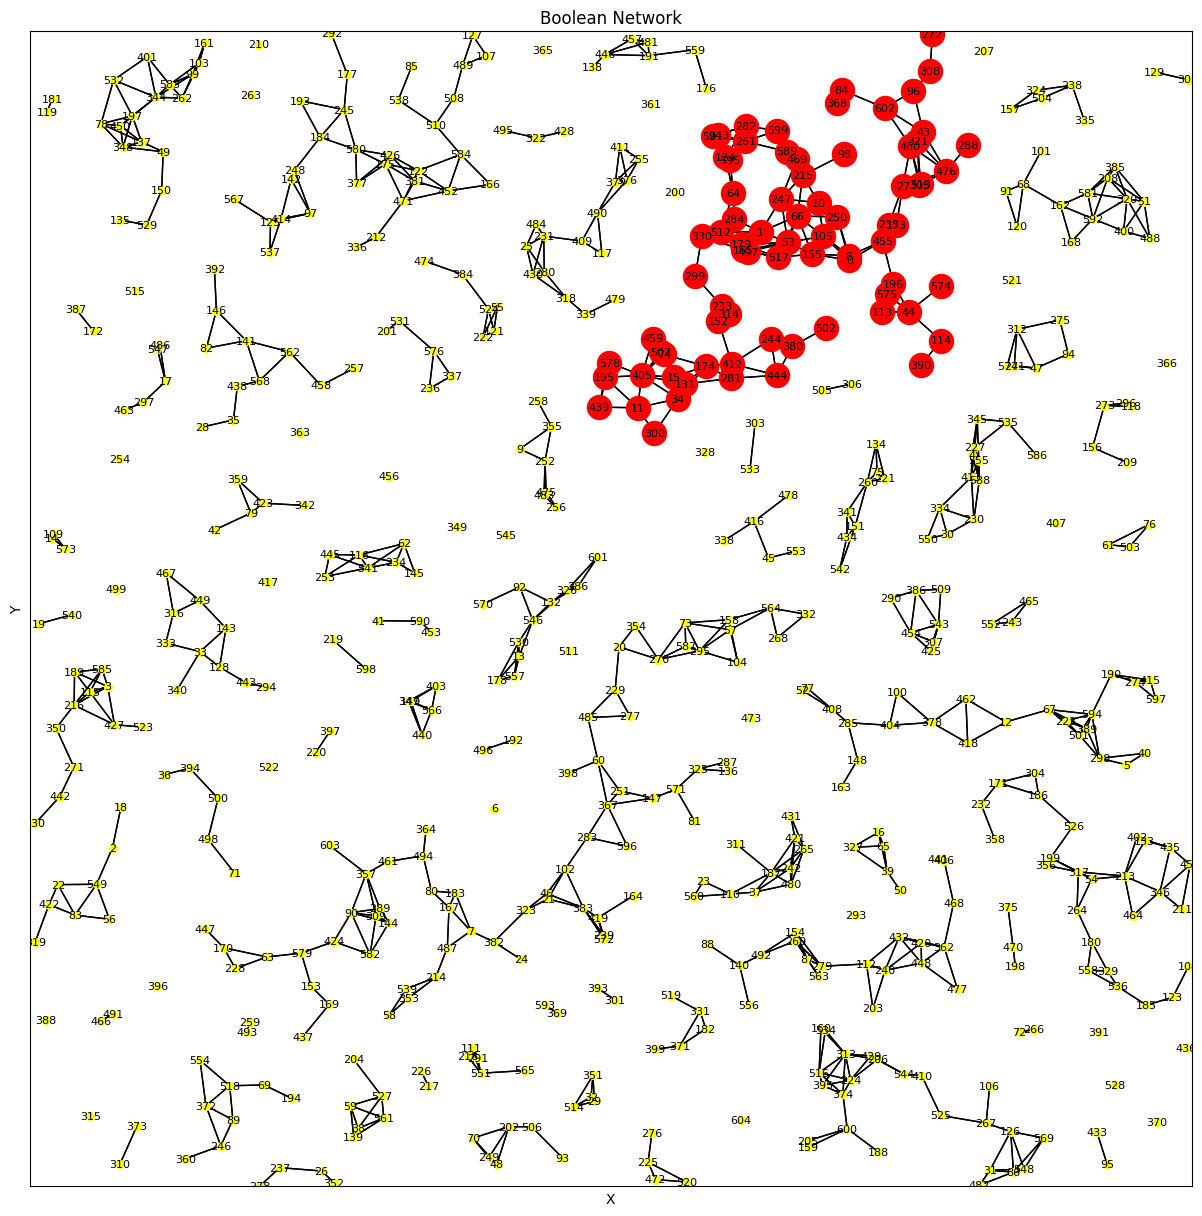

Graph with 605 nodes and 889 edges
clusters:  [{0, 1, 512, 513, 131, 517, 261, 390, 8, 10, 11, 15, 272, 405, 152, 281, 282, 27, 155, 284, 412, 288, 34, 165, 299, 44, 173, 43, 174, 300, 305, 179, 308, 53, 439, 314, 444, 574, 575, 64, 321, 66, 195, 196, 578, 455, 330, 74, 460, 589, 459, 591, 595, 84, 469, 215, 599, 343, 602, 476, 96, 98, 105, 233, 235, 368, 113, 497, 114, 244, 502, 247, 380, 250, 507, 124}, {2, 549, 422, 18, 83, 22, 56, 319}, {130, 3, 585, 427, 523, 271, 115, 216, 442, 189, 350}, {227, 4, 230, 550, 586, 555, 588, 334, 535, 345, 413, 30}, {5, 389, 12, 274, 404, 148, 408, 285, 415, 418, 163, 40, 298, 52, 190, 67, 77, 462, 594, 597, 223, 100, 501, 378}, {6}, {7, 136, 268, 398, 270, 144, 147, 20, 21, 277, 24, 153, 539, 283, 158, 287, 289, 419, 164, 167, 424, 169, 170, 295, 46, 564, 309, 437, 183, 57, 58, 571, 572, 60, 63, 447, 323, 579, 325, 582, 73, 587, 332, 461, 80, 81, 596, 214, 90, 603, 353, 354, 228, 357, 102, 487, 485, 229, 104, 364, 494, 239, 367, 251, 382, 383}, {25

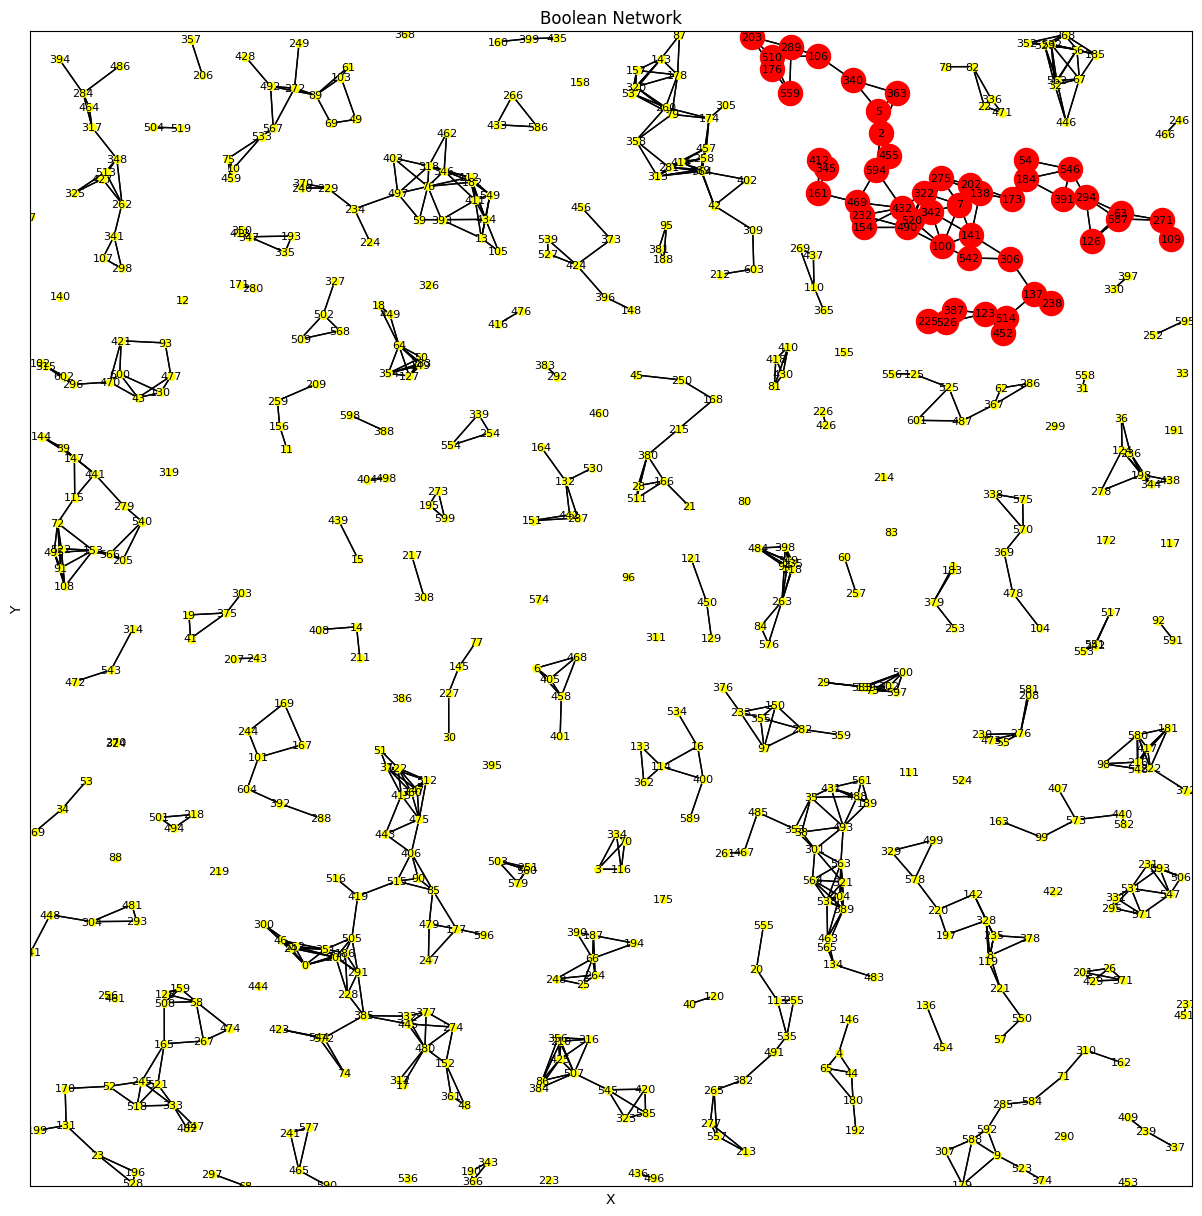

Graph with 605 nodes and 890 edges
clusters:  [{0, 385, 512, 515, 516, 17, 274, 406, 24, 152, 415, 544, 291, 419, 37, 423, 552, 300, 46, 47, 48, 177, 51, 312, 186, 443, 572, 445, 200, 74, 332, 596, 85, 90, 475, 351, 480, 479, 228, 360, 377, 361, 247, 505, 122}, {1, 379, 253, 183}, {2, 514, 387, 5, 7, 520, 137, 138, 391, 141, 526, 271, 275, 154, 412, 542, 161, 289, 546, 294, 173, 559, 432, 176, 306, 54, 184, 63, 322, 452, 455, 202, 203, 587, 594, 340, 469, 342, 345, 225, 100, 232, 490, 363, 106, 109, 238, 126, 123, 510}, {70, 3, 116, 334}, {192, 65, 4, 44, 146, 180}, {6, 458, 401, 468, 405}, {578, 197, 550, 8, 328, 329, 235, 142, 499, 119, 57, 378, 220, 221}, {162, 71, 584, 9, 523, 588, 592, 179, 307, 374, 310, 285}, {89, 69, 103, 10, 75, 459, 492, 428, 272, 49, 533, 567, 249, 61}, {259, 209, 11, 156}, {12}, {393, 13, 403, 411, 549, 434, 182, 59, 318, 76, 462, 346, 224, 229, 105, 234, 112, 497, 240, 370}, {408, 211, 14}, {439, 15}, {133, 362, 589, 16, 400, 114, 534}, {64, 449, 354, 18, 

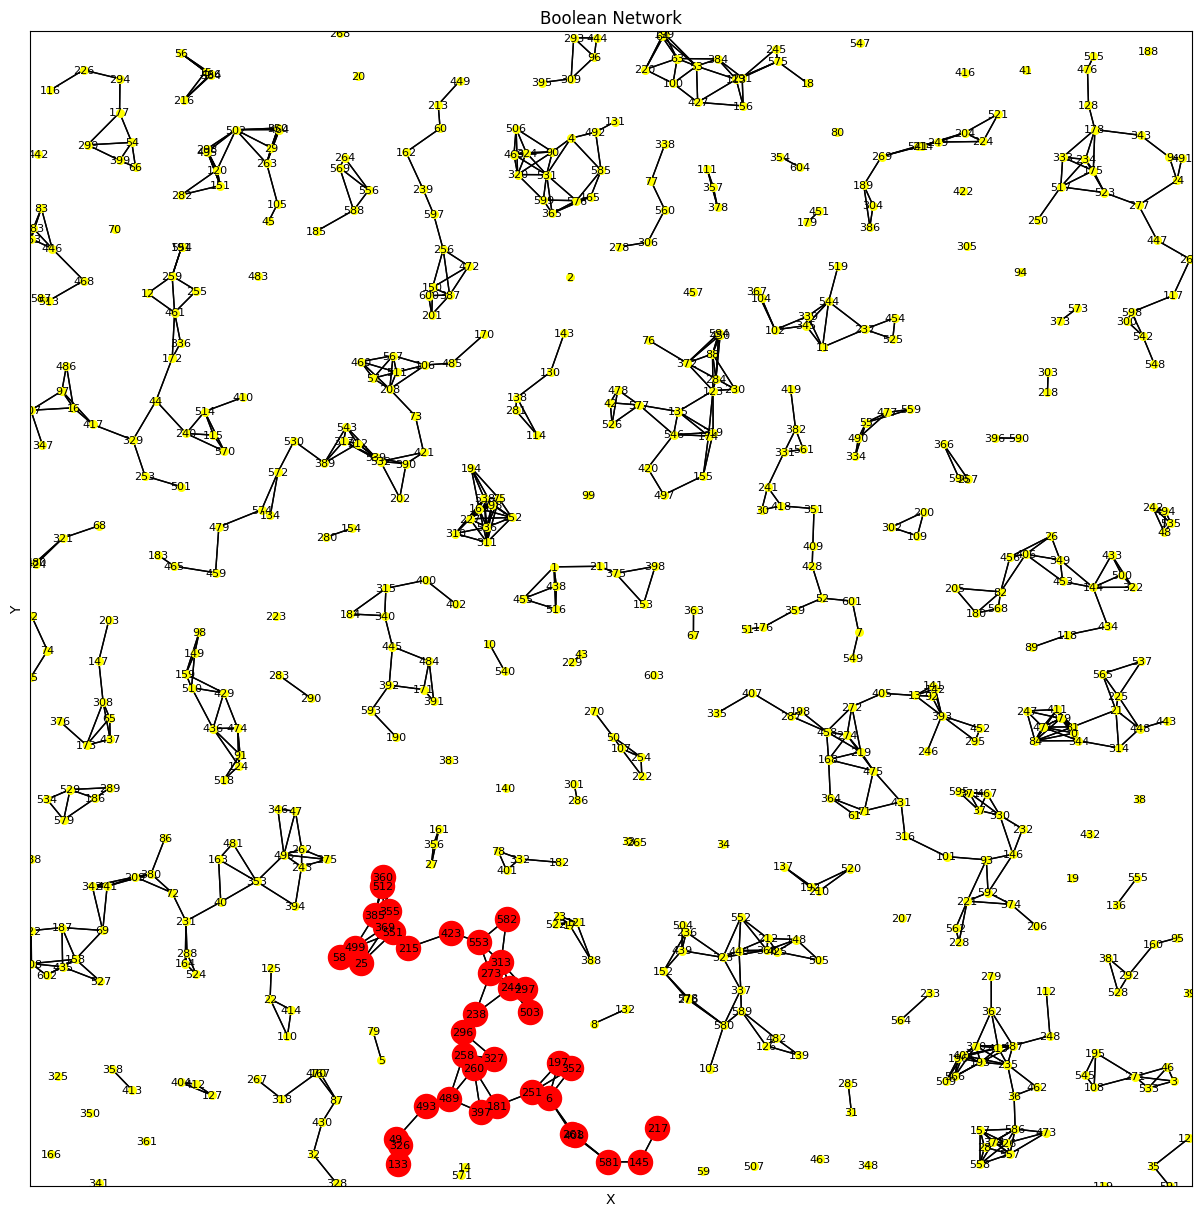

Graph with 605 nodes and 895 edges
clusters:  [{0, 448, 225, 247, 81, 379, 84, 21, 565, 471, 344, 537, 314, 411, 443}, {1, 516, 455, 398, 211, 438, 375, 153}, {2}, {545, 3, 195, 108, 46, 271, 533}, {576, 320, 131, 4, 165, 324, 585, 492, 365, 506, 531, 469, 599, 90}, {5, 79}, {512, 385, 258, 260, 261, 6, 133, 397, 145, 273, 408, 25, 423, 296, 297, 553, 551, 49, 181, 313, 58, 197, 581, 327, 326, 582, 215, 217, 352, 355, 360, 489, 493, 238, 369, 499, 244, 503, 251}, {418, 382, 419, 549, 7, 359, 409, 331, 428, 176, 241, 561, 51, 52, 601, 30, 351}, {8, 132}, {128, 515, 517, 9, 266, 523, 277, 24, 542, 548, 300, 175, 178, 447, 333, 598, 343, 476, 234, 491, 117, 250}, {10, 540}, {544, 102, 519, 454, 104, 11, 237, 525, 367, 339, 345}, {514, 259, 12, 16, 410, 417, 554, 172, 44, 307, 570, 191, 329, 461, 336, 347, 97, 486, 240, 115, 501, 253, 255}, {393, 13, 142, 141, 272, 274, 146, 405, 407, 287, 37, 295, 168, 431, 562, 316, 61, 452, 198, 71, 458, 330, 206, 335, 592, 467, 595, 475, 219, 92, 93, 2

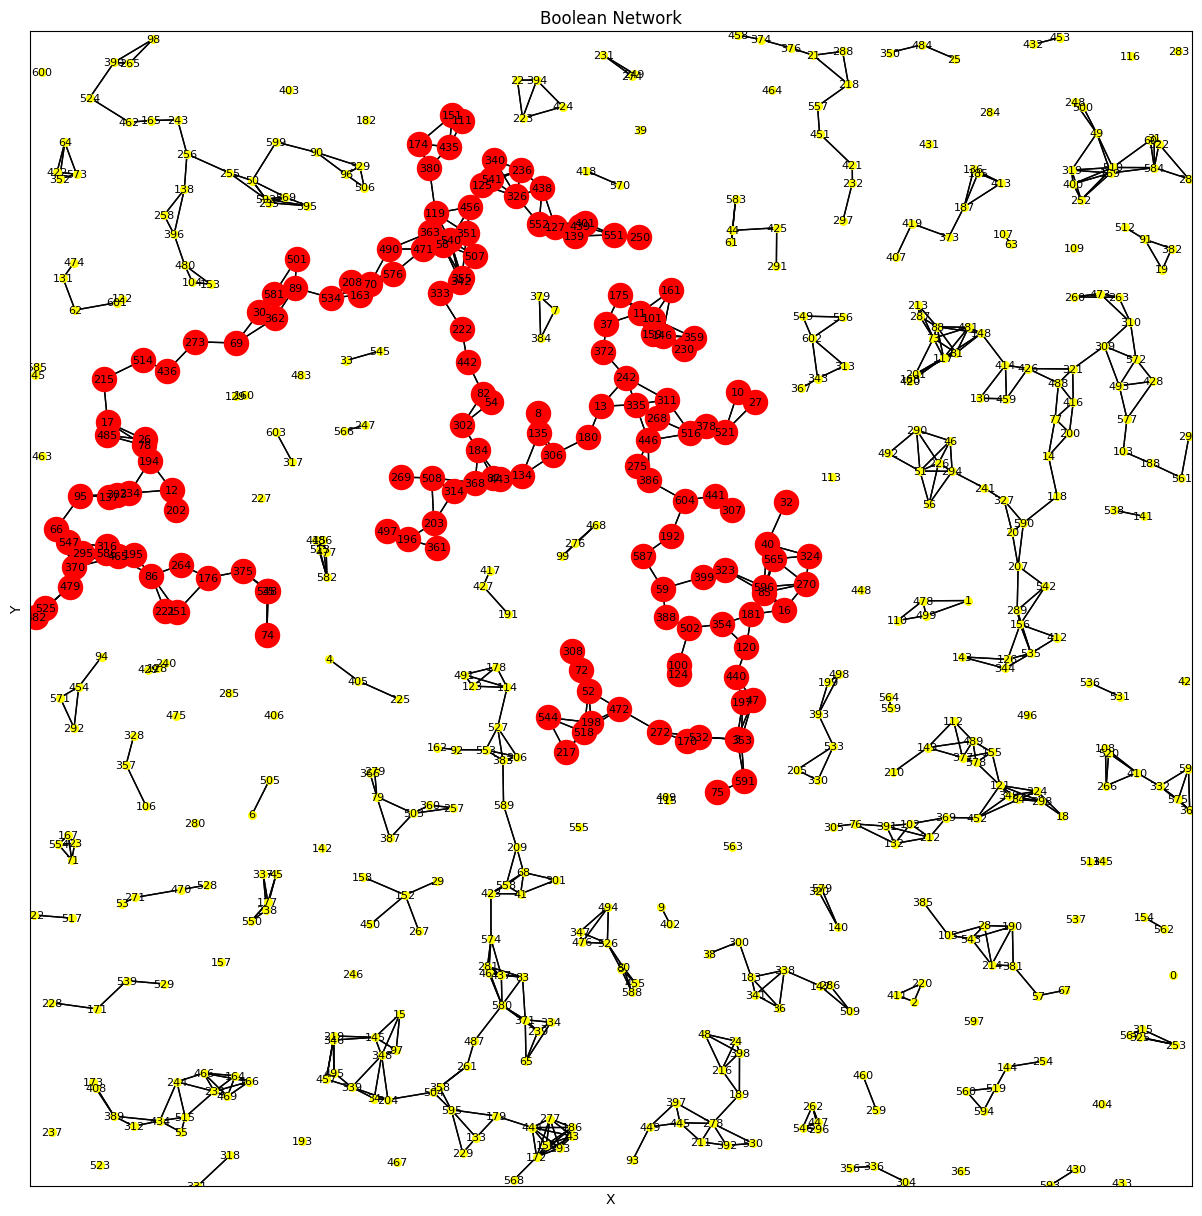

Graph with 605 nodes and 887 edges
clusters:  [{0}, {1, 110, 499, 478}, {2, 411, 220}, {514, 3, 516, 518, 8, 521, 10, 11, 12, 13, 525, 16, 17, 532, 534, 26, 27, 540, 541, 30, 544, 32, 547, 35, 37, 548, 551, 40, 552, 47, 52, 565, 54, 58, 59, 576, 66, 581, 70, 69, 72, 586, 75, 587, 74, 78, 591, 82, 596, 85, 86, 87, 89, 604, 95, 100, 101, 111, 119, 120, 124, 125, 127, 134, 135, 137, 139, 146, 151, 159, 161, 163, 170, 174, 175, 176, 180, 181, 184, 192, 194, 195, 196, 197, 198, 202, 203, 208, 215, 217, 221, 222, 230, 234, 236, 242, 250, 251, 264, 268, 269, 270, 272, 273, 275, 295, 302, 303, 306, 307, 308, 311, 314, 316, 323, 324, 326, 333, 335, 340, 342, 351, 353, 354, 355, 359, 361, 362, 363, 368, 370, 372, 375, 378, 380, 386, 388, 399, 401, 435, 436, 438, 439, 440, 441, 442, 443, 446, 456, 465, 471, 472, 479, 482, 485, 490, 497, 501, 502, 507, 508}, {225, 4, 405}, {5, 455, 588, 526, 494, 80, 347, 476}, {505, 6}, {384, 379, 7}, {9, 402}, {130, 260, 263, 14, 143, 20, 148, 535, 156, 412, 414

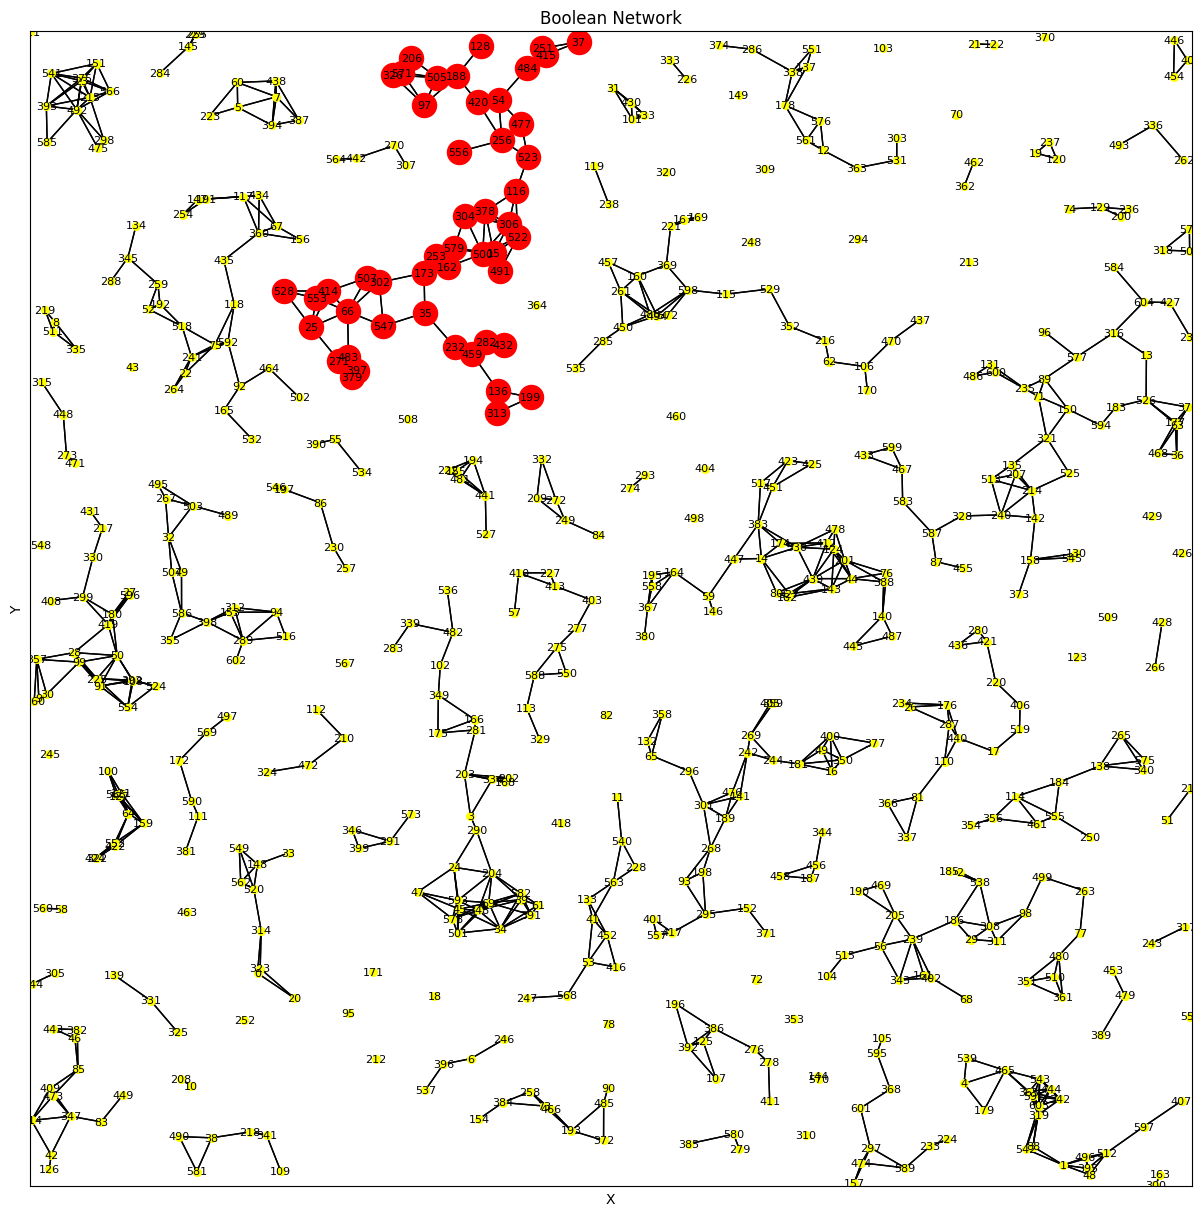

Graph with 605 nodes and 881 edges
clusters:  [{0, 33, 323, 549, 520, 562, 20, 148, 314}, {512, 1, 4, 395, 407, 539, 542, 543, 48, 179, 444, 319, 591, 465, 597, 342, 88, 603, 365, 496}, {2, 515, 263, 402, 538, 29, 161, 308, 311, 56, 185, 186, 190, 68, 205, 77, 469, 343, 351, 480, 98, 104, 361, 239, 499, 510}, {3, 391, 24, 281, 536, 283, 290, 34, 166, 39, 168, 45, 47, 175, 61, 578, 69, 582, 202, 203, 204, 334, 593, 339, 348, 349, 482, 102, 501}, {387, 5, 7, 394, 438, 60, 223}, {537, 396, 6, 246}, {8, 219, 335, 511}, {260, 9, 524, 408, 27, 28, 30, 419, 292, 554, 299, 431, 50, 180, 330, 596, 217, 91, 225, 99, 357, 108}, {208, 10}, {416, 228, 133, 452, 41, 11, 563, 53, 247, 568, 540}, {576, 551, 137, 363, 12, 303, 561, 178, 531, 338, 374, 286}, {513, 130, 131, 135, 13, 526, 525, 142, 150, 158, 545, 36, 427, 177, 433, 183, 316, 63, 577, 321, 71, 584, 328, 583, 587, 455, 207, 594, 467, 468, 214, 87, 600, 89, 599, 604, 96, 486, 231, 235, 240, 373, 376}, {388, 517, 140, 14, 143, 530, 146, 412,

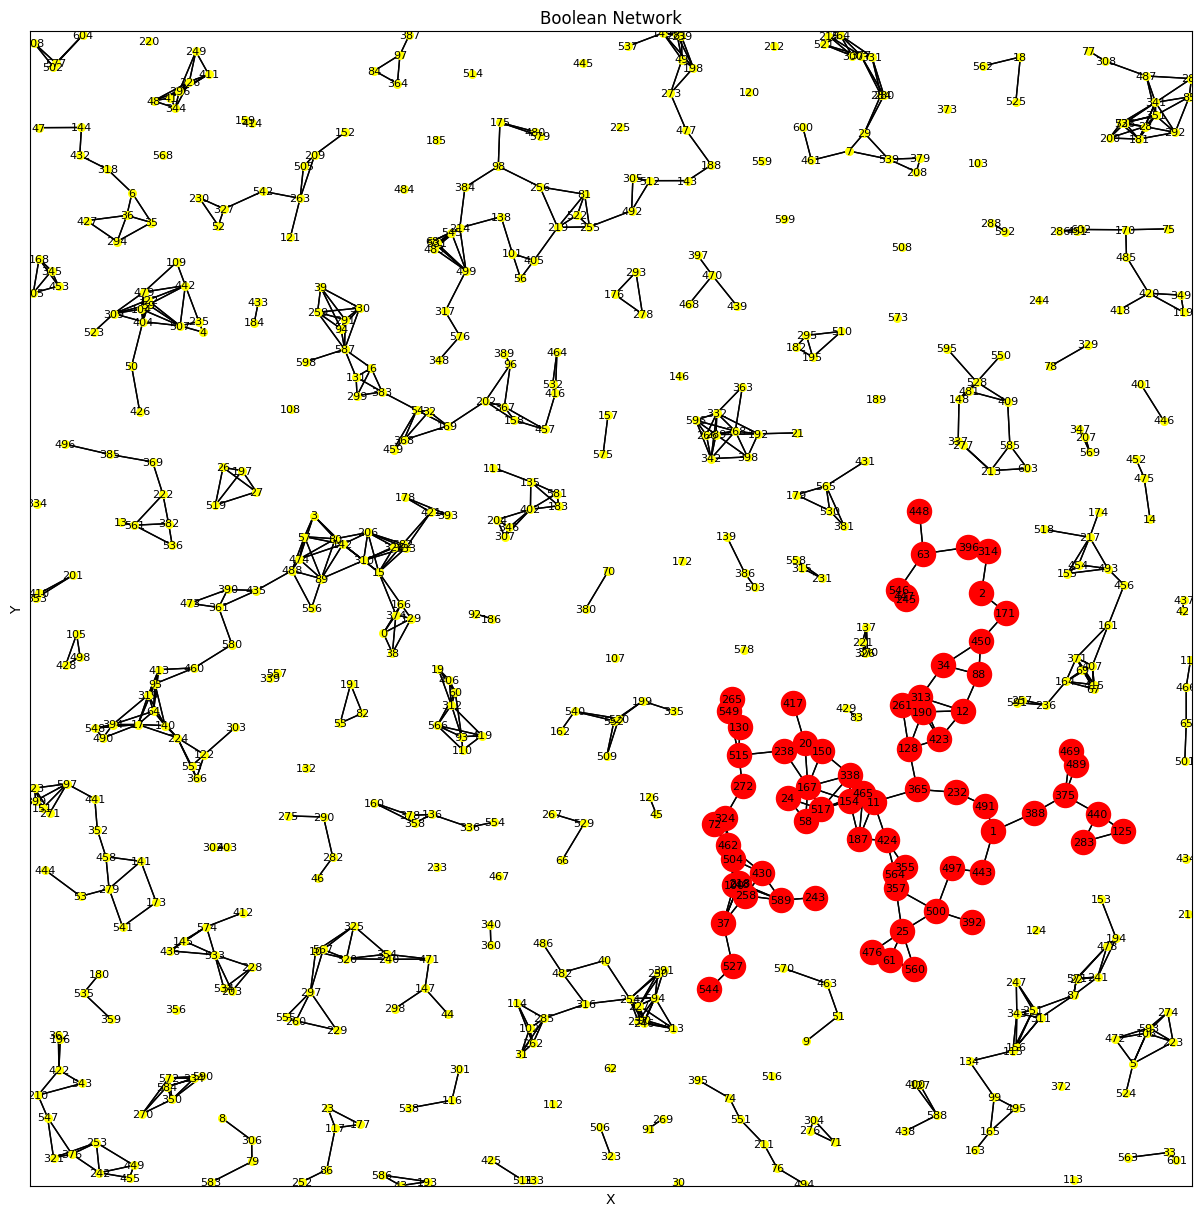

Graph with 605 nodes and 899 edges
clusters:  [{0, 129, 3, 390, 393, 394, 140, 142, 15, 17, 413, 548, 421, 166, 38, 553, 556, 303, 178, 435, 310, 57, 319, 64, 580, 582, 328, 460, 333, 206, 80, 89, 474, 473, 95, 224, 488, 361, 490, 366, 374, 122}, {128, 1, 130, 515, 388, 261, 517, 2, 392, 265, 258, 11, 12, 396, 527, 272, 20, 150, 24, 25, 154, 283, 544, 417, 34, 546, 549, 37, 423, 424, 167, 171, 430, 560, 564, 440, 313, 58, 443, 187, 61, 190, 314, 63, 448, 450, 447, 324, 72, 589, 462, 465, 338, 469, 88, 218, 476, 248, 355, 100, 357, 232, 489, 491, 365, 238, 497, 243, 500, 245, 375, 504, 125}, {322, 4, 104, 59, 426, 235, 523, 109, 50, 404, 309, 442, 507, 479}, {5, 106, 524, 593, 274, 472, 223}, {35, 36, 294, 6, 427, 47, 432, 144, 318}, {7, 264, 521, 600, 331, 461, 300, 208, 379, 215, 280, 377, 539, 284, 29}, {8, 306, 583, 79}, {9, 570, 51, 463}, {320, 354, 471, 260, 325, 229, 297, 10, 555, 298, 44, 240, 147, 567}, {385, 382, 13, 496, 561, 369, 536, 222}, {475, 452, 14}, {131, 259, 389, 16

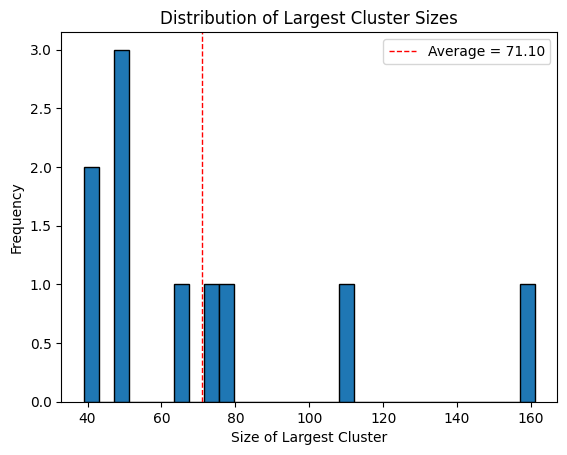

In [25]:
#BEST VERSION
#input:
r = 1 #radius of discs

#T = np.random.randint(100,200) #set size of the squared domain as a rnadom value between 10 e 20  
#T = 200 #set size of the domain #200 -> too much time , test with 10
T =50

#density lambda
density = 0.25 #i dont know the best number!! (PER OGNI LOOP DEVO AUMENTARE LA DENSITA DI UN TOT)
# T = 50, M = 10
#density = 0.1 -> average 11
#density = 0.2 -> average 41
#density = 0.35 -> average 468
#density = 0.4 -> average 758
#density = 0.5 -> average 1174

#i have to also set the number of simulation 
M = 10

# now i try to generate the points
#for the pois i can use the formulation or i can search a library (numpy)
#pois is lambda * T^2
N_points = number_points(density,T) #INSERIRLO NELLA CREAZIONE DEL BOOLE

#list with all the largest cluster
largest_cluster = []

#----------------

for i in range(M):


    #now i create the boolean network model
    #ATTENZIONE dall esempio/projetto mi sembra che al creation_bool devo passare il numero di
    #punti nel dominio e non i punti; forse i punti li devo creare nel creation_bool
    #pero guardando l'esempio del algorithmo di poisson mi verebbe da fare tutto 
    #in un colpo; in caso creare due versioni!!!
    #OPPURE nel loop per creare i graph metto anche quello er la creazione
    #dei punti pero dovrei tenere fuori N (X) perchè è sempre lo stesso nella 
    #creazione del boolean network (quindi creazione N; loop -> creazione loop, creazione bool)
    graph_bool = creation_boolean_network_test2(N_points, T, r)
    print(graph_bool)
    #structure of the graph
    #for node,edges in zip(graph_bool.nodes,graph_bool.edges):
        #print(f'node: {node} -> edges: {edges}')

    #find the largest cluster
    #largest_cluster = find_largest_cluster(graph_bool)
    largest_cluster.append(find_largest_cluster(graph_bool))

print(largest_cluster)
empirical_average(largest_cluster)


# TEST 3

add the question about the density_c and the number of cluster

In [ ]:
# TEST 3

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

my_generator = np.random.default_rng()

def number_points(density, T):

    #number of points
    N = my_generator.poisson(lam=density*T*T)
    return N

# A Boolean random network on the plane, denoted by (X, λ, r)
#in this case i create le function in a different way becouse it is iteractive
#and N have to be always the same
def creation_boolean_network_test2(N_points, T, r):

    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N_points, 2))
    #the points are equaly distributet between the domanin so 0 and T and have a structure (U, V) so N*2

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 

        #creation graph
        #empty graph
        #nx.Graph? A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        #graph.add_nodes_from? nodes_for_adding : iterable container, attr: attributes
        graph.add_nodes_from(range(N_points))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N_points):
            for j in range(i+1, N_points):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node

        return graph

def create_clusters(graph):
    
    #create the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    clusters = list(nx.connected_components(graph))
    print(clusters)
    return clusters
    

def find_largest_cluster(clusters):
    #create/understand the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    #clusters = list(nx.connected_components(graph)) 
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)
    print(largest_cluster)

    #return the size of the largest cluster
    return len(largest_cluster)

def find_number_of_clusters(clusters):
    #clusters = list(nx.connected_components(graph)) #try to use the function only one time to speed up the code
    return len(clusters)

#------------------------------------------------

#radius of discs
r = 1 

#for the domain from 0 to T
T = 50

#density_c
density_c = 4.512 / (4 * np.pi) #critical density

#density lambda
density = []
for i in np.arange(0.05, 0.50, 0.05).round(2):
    density.append(i)

#i have to also set the number of simulation 
M = 10

#list with all the largest cluster depending by density
largest_cluster_density = []
#list with the number of cluster depending by density
number_of_cluster_density = []

#----------------------------------------------------------

#run simulation depending on the density
for i in density:

    #list for the independent simulation
    largest_cluster_M = []
    number_of_cluster_M = []
    
    # now i try to generate the points
    #for the pois i can use the formulation or i can search a library (numpy)
    #pois is lambda * T^2
    N_points = number_points(i,T) #MODIFICARE E METTERLO DENTRO A CREATION BOOLEAN NETWORK!!!!!!!!!!!!!!

    #run the independent simulation
    for j in range(M):

        #now i create the boolean network model
        graph_bool = creation_boolean_network_test2(N_points, T, r)
        print(graph_bool)

        #cluster the points
        clusters = create_clusters(graph_bool)

        #find the largest cluster
        #largest_cluster = find_largest_cluster(graph_bool)
        largest_cluster_M.append(find_largest_cluster(clusters))

        #find the number of cluster
        number_of_cluster_M.append(find_number_of_clusters(clusters))

    largest_cluster_density.append(np.mean(largest_cluster_M))
    number_of_cluster_density.append(np.mean(number_of_cluster_M))

#print the 2 list for density
print("largest cluster by density: ", largest_cluster_density)
print("number of cluster by density: ", number_of_cluster_density)

# Plotting the size of the largest cluster against lambda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(density, largest_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Size of the Largest Cluster')
plt.title('Size of the Largest Cluster vs. λ')
plt.legend()

# Plotting the number of clusters against lambda
plt.subplot(1, 2, 2)
plt.plot(density, number_of_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters vs. λ')
plt.legend()


density from 0.05 to 0.5 and step = 0.05

T = 100

M = 20

time -> 60 min

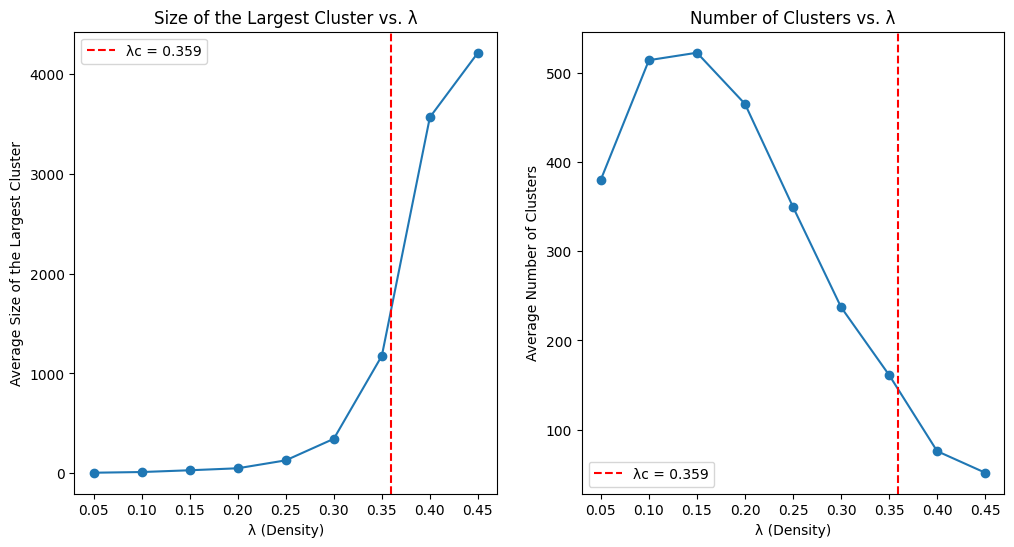

# TEST 4

In [ ]:
# TEST 4

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

my_generator = np.random.default_rng()

# A Boolean random network on the plane, denoted by (X, λ, r)
#in this case i create le function in a different way becouse it is iteractive
#and N have to be always the same
def creation_boolean_network_test2(density, T, r):

    
    #number of points
    N = my_generator.poisson(lam=density*T*T)
    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N, 2))
    #the points are equaly distributet between the domanin so 0 and T and have a structure (U, V) so N*2

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 

        #creation graph
        #A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        graph.add_nodes_from(range(N))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N):
            for j in range(i+1, N):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node

        return graph

def create_clusters(graph):
    
    #create the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    clusters = list(nx.connected_components(graph))
    print(clusters)
    return clusters
    

def find_largest_cluster(clusters):
    #create/understand the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    #clusters = list(nx.connected_components(graph)) 
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)
    print(largest_cluster)

    #return the size of the largest cluster
    return len(largest_cluster)

def find_number_of_clusters(clusters):
    #clusters = list(nx.connected_components(graph)) #try to use the function only one time to speed up the code
    return len(clusters)

#------------------------------------------------

#radius of discs
r = 1 

#for the domain from 0 to T
T = 50

#density_c
density_c = 4.512 / (4 * np.pi) #critical density

#density lambda
density = []
for i in np.arange(0.05, 0.50, 0.05).round(2):
    density.append(i)

#i have to also set the number of simulation 
M = 10

#list with all the largest cluster depending by density
largest_cluster_density = []
#list with the number of cluster depending by density
number_of_cluster_density = []

#----------------------------------------------------------

#run simulation depending on the density
for i in density:

    #list for the independent simulation
    largest_cluster_M = []
    number_of_cluster_M = []
    
    # now i try to generate the points
    #for the pois i can use the formulation or i can search a library (numpy)
    #pois is lambda * T^2
    #N_points = number_points(i,T) #MODIFICARE E METTERLO DENTRO A CREATION BOOLEAN NETWORK!!!!!!!!!!!!!!

    #run the independent simulation
    for j in range(M):

        #now i create the boolean network model
        graph_bool = creation_boolean_network_test2(i, T, r) #density, max domain, radius
        print(graph_bool)

        #cluster the points
        clusters = create_clusters(graph_bool)

        #find the largest cluster
        #largest_cluster = find_largest_cluster(graph_bool)
        largest_cluster_M.append(find_largest_cluster(clusters))

        #find the number of cluster
        number_of_cluster_M.append(find_number_of_clusters(clusters))

    largest_cluster_density.append(np.mean(largest_cluster_M))
    number_of_cluster_density.append(np.mean(number_of_cluster_M))

#print the 2 list for density
print("largest cluster by density: ", largest_cluster_density)
print("number of cluster by density: ", number_of_cluster_density)

# Plotting the size of the largest cluster against lambda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(density, largest_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Size of the Largest Cluster')
plt.title('Size of the Largest Cluster vs. λ')
plt.legend()

# Plotting the number of clusters against lambda
plt.subplot(1, 2, 2)
plt.plot(density, number_of_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters vs. λ')
plt.legend()


# FINAL

Percolation theory describes how the size of clusters of connected set of edges of large random networks
varies as the connectivity - i.e. (for example) the probability that two vertices are connected by an edge - changes. As the
connectivity increases (density) the system undergoes a transition from a situation where the clusters are small in size to
a picture with significantly larger clusters. This transition is not smooth, but rather it happens sharply as the
connectivity crosses a critical value (critical density), called percolation threshold∗. The scope of the present project is to study
numerically this phenomenon in Boolean networks

Library

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


my_generator = np.random.default_rng()

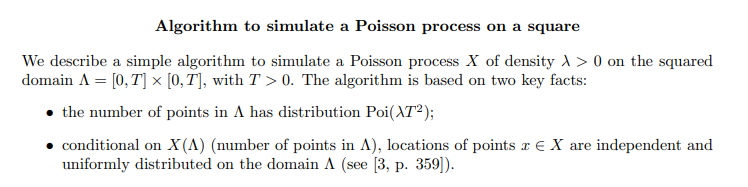

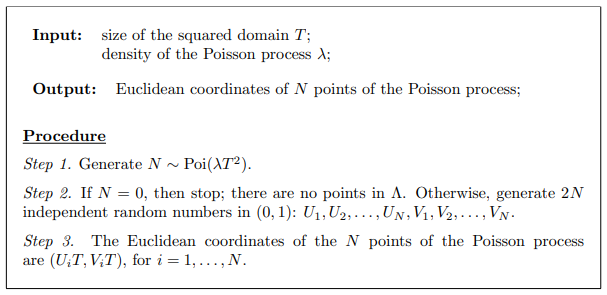

In [8]:
def creation_points(density, T):

    #number of points
    N = my_generator.poisson(lam=density*T*T)
    #creation points
    points = my_generator.uniform(low = 0, high = T, size = (N, 2))
    #the points are equaly distributet between the domanin so 0 and T and have a structure (U, V) so N*2

    return N, points


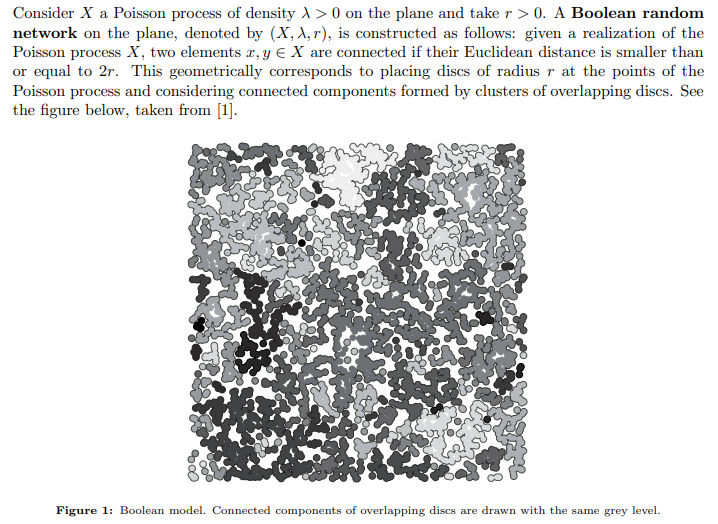

In [9]:
def creation_boolean_network_test2(density, T, r):

    N, points = creation_points(density, T)    

    if (len(points) == 0): #we dont have points
        print("error no points in the domain = 0") #impossible
        return
    else: 

        #creation graph
        #A Graph stores nodes and edges with optional data, or attributes
        #Edges are represented as links between nodes with optional key/value attributes
        graph = nx.Graph()
        #add the points in the graph (nodes)
        graph.add_nodes_from(range(N))

        #two elements x, y ∈ X are connected if their Euclidean distance is smaller than or equal to 2r
        #check if two points have distance(euclidea) < 2*r
        for i in range(N):
            for j in range(i+1, N):
                #if euclidean_distance(points[i] - points[j]) <= 2*r: #TEST
                #    graph.add_edge(i,j)
                if np.linalg.norm(points[i] - points[j]) <= 2*r:
                    graph.add_edge(i, j) #add edge between nodei and node

        return graph


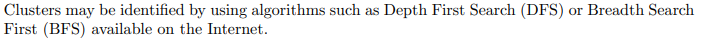

In [10]:
def create_clusters(graph):
    
    #create the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    clusters = list(nx.connected_components(graph))
    print(clusters)
    return clusters

In [11]:
def find_largest_cluster(clusters):
    #create/understand the cluster
    #find alle the connected components
    #connected_components -> implements DFS or BFS
    #clusters = list(nx.connected_components(graph)) 
    
    #find the largest cluster
    largest_cluster = max(clusters, key=len)
    print(largest_cluster)

    #return the size of the largest cluster
    return len(largest_cluster)


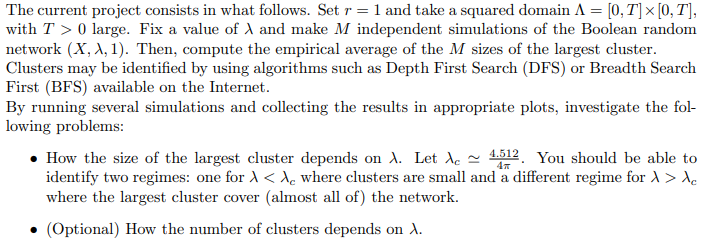

Graph with 130 nodes and 34 edges
[{0}, {1}, {2}, {3}, {4}, {5}, {46, 6, 55}, {25, 34, 7}, {8}, {9, 122}, {10, 126}, {106, 11}, {88, 12}, {13, 71}, {14}, {15}, {16}, {17}, {18, 54}, {19, 87}, {20}, {21}, {22}, {72, 116, 23}, {24}, {26}, {129, 27}, {28}, {29}, {30}, {117, 31}, {32, 51, 77}, {40, 33}, {35}, {36}, {57, 75, 59, 37}, {86, 38}, {39}, {41}, {42}, {43}, {44}, {45, 94}, {47}, {48}, {49}, {50, 85}, {52}, {53}, {56, 89, 65}, {58}, {60, 103}, {61}, {62}, {63}, {64}, {66}, {67, 108}, {68}, {69}, {99, 70, 119}, {73}, {74}, {81, 76}, {110, 78}, {79}, {80}, {82}, {83}, {84}, {90}, {91}, {92}, {93}, {123, 95}, {96}, {97}, {98}, {100}, {101}, {102}, {104}, {105}, {107}, {109}, {111}, {112}, {113}, {114}, {115}, {118}, {120}, {121}, {124}, {125}, {127}, {128}]
{57, 75, 59, 37}
Graph with 128 nodes and 38 edges
[{0}, {1, 69, 70}, {2}, {3}, {73, 4}, {5}, {122, 44, 6}, {58, 7}, {8, 91, 14}, {9, 16, 113, 114, 126}, {10}, {11}, {12}, {13, 39}, {15}, {17}, {18, 82}, {19}, {50, 107, 20}, {97, 1

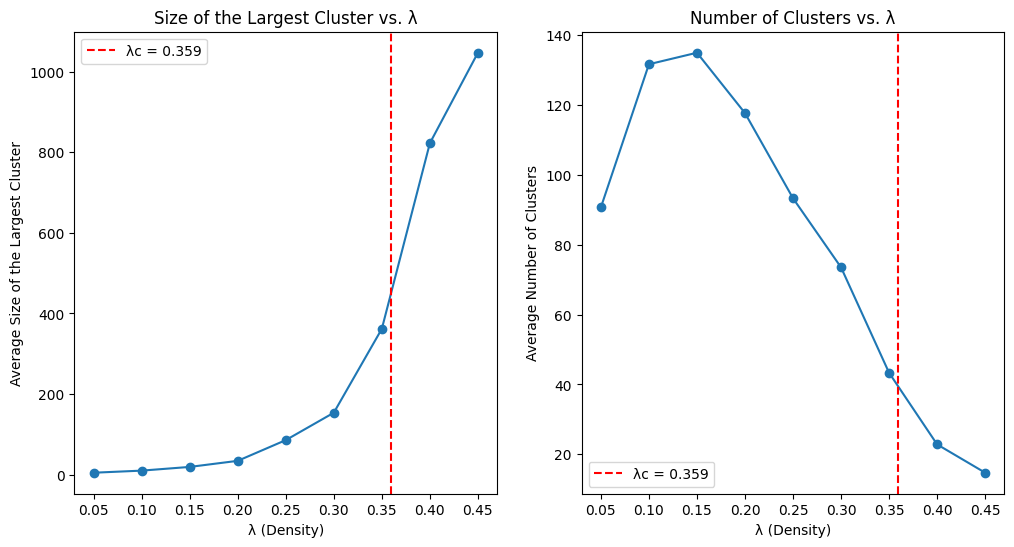

In [12]:
#radius of discs
r = 1 

#for the domain from 0 to T
T = 50

#density_c
density_c = 4.512 / (4 * np.pi) #critical density

#density lambda
density = []
for i in np.arange(0.05, 0.50, 0.05).round(2):
    density.append(i)

#i have to also set the number of simulation 
M = 10

#list with all the largest cluster depending by density
largest_cluster_density = []
#list with the number of cluster depending by density
number_of_cluster_density = []

#----------------------------------------------------------

#run simulation depending on the density
for i in density:

    #list for the independent simulation
    largest_cluster_M = []
    number_of_cluster_M = []
    
    # now i try to generate the points
    #for the pois i can use the formulation or i can search a library (numpy)
    #pois is lambda * T^2
    #N_points = number_points(i,T) #MODIFICARE E METTERLO DENTRO A CREATION BOOLEAN NETWORK!!!!!!!!!!!!!!

    #run the independent simulation
    for j in range(M):

        #now i create the boolean network model
        graph_bool = creation_boolean_network_test2(i, T, r) #density, max domain, radius
        print(graph_bool)

        #cluster the points
        clusters = create_clusters(graph_bool)

        #find the largest cluster
        #largest_cluster = find_largest_cluster(graph_bool)
        largest_cluster_M.append(find_largest_cluster(clusters))

        #find the number of cluster
        number_of_cluster_M.append(find_number_of_clusters(clusters))

    largest_cluster_density.append(np.mean(largest_cluster_M))
    number_of_cluster_density.append(np.mean(number_of_cluster_M))

#print the 2 list for density
print("largest cluster by density: ", largest_cluster_density)
print("number of cluster by density: ", number_of_cluster_density)

# Plotting the size of the largest cluster against lambda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(density, largest_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Size of the Largest Cluster')
plt.title('Size of the Largest Cluster vs. λ')
plt.legend()

# Plotting the number of clusters against lambda
plt.subplot(1, 2, 2)
plt.plot(density, number_of_cluster_density, marker='o', linestyle='-')
plt.axvline(x=density_c, color='r', linestyle='--', label=f'λc = {density_c:.3f}')
plt.xlabel('λ (Density)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters vs. λ')
plt.legend()
